In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('emails.csv')


In [3]:
df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.isnull().sum()


Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
df.dropna(how='any',inplace=True)


In [6]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,precision_score,recall_score,plot_precision_recall_curve,plot_roc_curve
def report(classifier):
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    display = ConfusionMatrixDisplay(cm,display_labels=classifier.classes_)
    display.plot()
    print(f"Accuracy:  {accuracy_score(y_test,y_pred)}")
    print(f"Precision Score:  {precision_score(y_test,y_pred)}")
    print(f"Recall Score:  {recall_score(y_test,y_pred)}")
    plot_precision_recall_curve(classifier,x_test,y_test)
    plot_roc_curve(classifier,x_test,y_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier


In [10]:
kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.8747099767981439
Precision Score:  0.7613065326633166
Recall Score:  0.8189189189189189


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


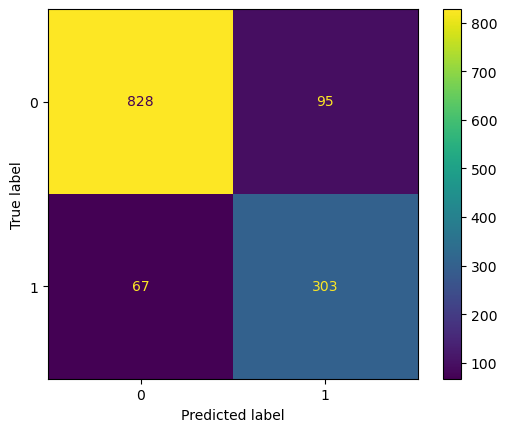

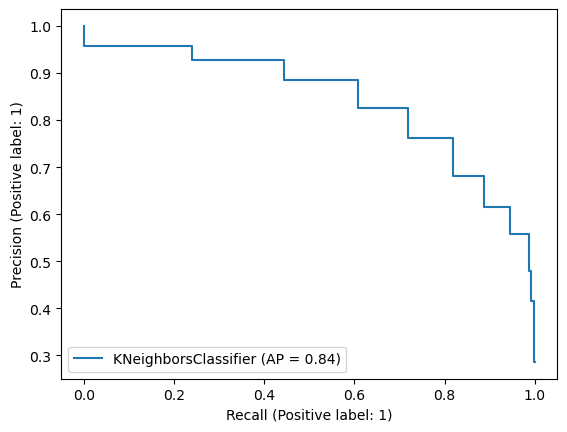

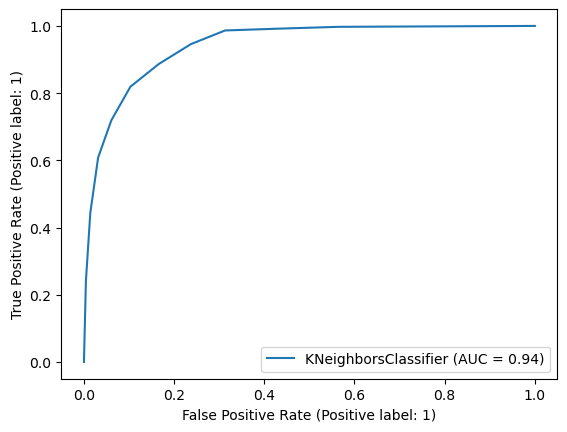

In [11]:
report(kNN)


In [12]:
from sklearn.svm import SVC
svm = SVC(gamma='auto',random_state=10)
svm.fit(x_train,y_train)


SVC(gamma='auto', random_state=10)

Accuracy:  0.9071925754060325
Precision Score:  0.9006410256410257
Recall Score:  0.7594594594594595


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


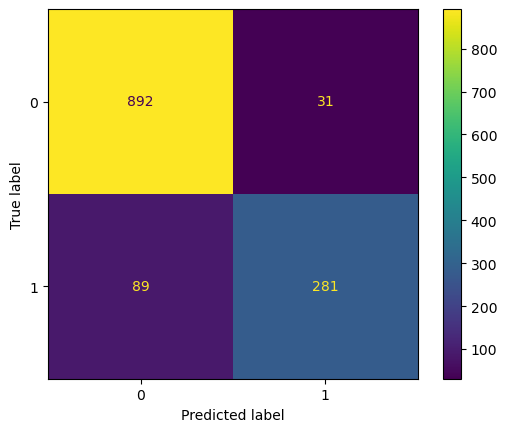

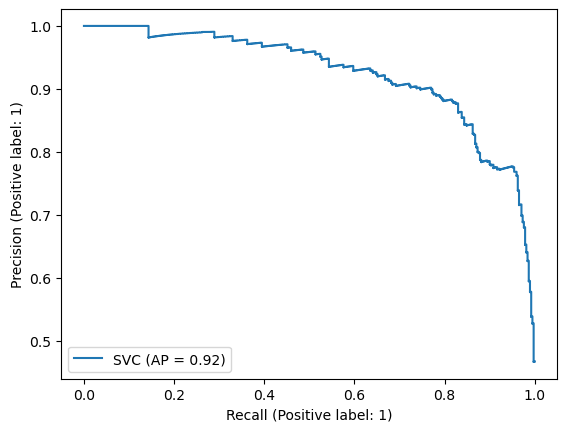

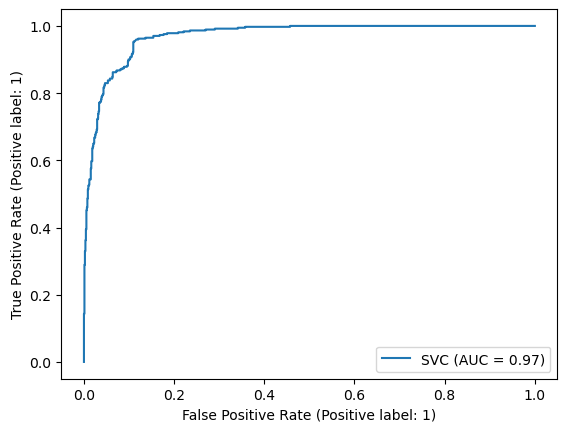

In [13]:
report(svm)
